In [11]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

import glob, os
import json

#import MySQLdb 
#import sshtunnel
#from sshtunnel import SSHTunnelForwarder
from sklearn.metrics import mean_absolute_error, mean_squared_error
#from datetime import date 
from datetime import datetime

pd.set_option('float_format', '{:f}'.format)

import pandas as pd
 

#import MySQLdb 
import numpy as np

In [25]:

import mysql.connector
ieo = pd.DataFrame()
price = pd.DataFrame()
grades = pd.DataFrame()


conn = mysql.connector.connect(host='tokenmetrics-restored-27-05.cxuzrhvtziar.us-east-1.rds.amazonaws.com', user='admin', passwd='WiG8Rled2cTvZ5JibJui',db='tokenmetrics')
cursor = conn.cursor()

 

query = 'SELECT * FROM ico_price_daily_summaries where currency ="USD";'
data = pd.read_sql_query(query, conn)
price = pd.concat([ieo,price])
 
    
conn.close()

In [36]:
price.head()

AttributeError: 'NoneType' object has no attribute 'items'

Empty DataFrame
Columns: []
Index: []

In [34]:
#ieo = ieo.drop(ieo[ieo['id'] == 3245].index)
ieo = ieo[:250]
#ieo['weight'] = ieo['ico_market_cap'] / ieo['ico_market_cap'].sum()
ieo = pd.merge(ieo,price[['ico_id','ico_symbol']], left_on='id',right_on='ico_id',how='inner')
#ieo = ieo.drop_duplicates('id')
#weight = ieo[['ico_symbol','weight']]
#weight = weight.sort_values('ico_symbol')

ieos = ieo['id'][:250]
df = price[price['ico_id'].isin(ieos)]
#df = df.drop_duplicates(subset=['date']).sort_values(by='date')


#temp = temp.dropna()

KeyError: "None of [Index(['ico_id', 'ico_symbol'], dtype='object')] are in the [columns]"

In [16]:
#price

In [32]:
temp = df['close'].groupby([df['date'],df['ico_symbol']]).mean()
temp = temp.unstack().sort_index()
temp.index = pd.to_datetime(temp.index)

In [33]:
temp

AttributeError: 'NoneType' object has no attribute 'items'

ico_symbol      ABT  AGI     AION     ALGO  AMB  ART      AST  ATL      AVT  \
date                                                                          
2017-12-23      nan  nan      nan      nan  nan  nan      nan  nan 3.021000   
2017-12-24      nan  nan      nan      nan  nan  nan      nan  nan 3.520100   
2017-12-25      nan  nan      nan      nan  nan  nan      nan  nan 4.311900   
2017-12-26      nan  nan      nan      nan  nan  nan      nan  nan 4.515200   
2017-12-27      nan  nan      nan      nan  nan  nan      nan  nan 4.460100   
...             ...  ...      ...      ...  ...  ...      ...  ...      ...   
2020-10-04 0.091347  nan 0.079392 0.312413  nan  nan 0.113097  nan      nan   
2020-10-05 0.091802  nan 0.079770 0.317825  nan  nan 0.118141  nan      nan   
2020-10-06 0.089350  nan 0.074170 0.287457  nan  nan 0.102908  nan      nan   
2020-10-07 0.087188  nan 0.073989 0.305144  nan  nan 0.112045  nan      nan   
2020-10-08 0.087630  nan 0.071470 0.299059  nan  nan

In [18]:
col = temp.loc['2019-01-01':].isnull().sum() <= 400

In [19]:
col = col[col == True]

In [20]:
col = col.index.tolist()

In [9]:
temp[col].loc['2019-01-01':]

ico_symbol,ABT,AGI,AION,ALGO,AMB,AST,AVT,BEAM,BLZ,BRD,...,QSP,RHOC,STX,THETA,TNT,TRX,VEE,WAN,ZIL,ZRX
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,nan,0.048279,0.124450,nan,nan,nan,0.172200,nan,nan,nan,...,nan,nan,nan,nan,0.011300,0.018680,0.003250,nan,0.020146,0.291770
2019-01-02,nan,0.040905,nan,nan,nan,nan,0.172100,nan,nan,nan,...,nan,nan,nan,nan,0.011400,0.019280,0.003250,nan,0.020293,0.311820
2019-01-03,nan,0.052000,0.163170,nan,0.066780,nan,0.172100,nan,nan,nan,...,nan,nan,nan,nan,0.011800,0.019740,0.003636,nan,0.020874,0.324250
2019-01-04,nan,0.049127,0.181140,nan,nan,nan,0.192000,nan,nan,nan,...,nan,nan,nan,nan,0.012100,0.019660,0.003350,nan,0.020572,0.316810
2019-01-05,nan,0.052000,nan,nan,nan,nan,0.199330,nan,nan,nan,...,nan,nan,nan,nan,0.011500,0.021050,nan,nan,0.020538,0.316670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-14,0.120008,nan,0.127253,0.642132,nan,0.210248,nan,0.560370,nan,0.146723,...,nan,nan,0.312905,0.399683,0.020550,0.024765,nan,0.420909,0.025067,0.528425
2020-08-15,0.118508,nan,0.122454,0.638736,nan,0.188401,nan,0.556561,nan,0.138952,...,nan,nan,0.288432,0.386007,0.019915,0.025174,nan,0.409575,0.024734,0.498299
2020-08-16,0.116632,nan,0.124795,0.632562,nan,0.174053,nan,0.543748,nan,0.142932,...,nan,nan,0.277467,0.396346,0.020092,0.028253,nan,0.430559,0.026575,0.602489


In [10]:
#col

In [11]:
#temp

In [12]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(temp[col].loc['2019-01-01':])
S = risk_models.sample_cov(temp[col].loc['2019-01-01':])

# Optimise for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.csv")  # saves to file
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('ABT', 0.0), ('AGI', 0.0), ('AION', 0.0), ('ALGO', 0.0), ('AMB', 0.0), ('AST', 0.14957), ('AVT', 0.0483), ('BEAM', 0.0), ('BLZ', 0.0), ('BRD', 0.0), ('CAT', 0.00641), ('DRGN', 0.0), ('ENG', 0.0), ('FSN', 0.10738), ('FUEL', 0.0), ('FX', 0.0), ('GNX', 0.0), ('GRIN', 0.0), ('GTO', 0.0), ('ICX', 0.0), ('JNT', 0.0), ('KEY', 0.0), ('KNC', 0.17014), ('LEND', 0.00165), ('LOOM', 0.0), ('MATIC', 0.13169), ('MOBI', 0.0), ('NAS', 0.0), ('NGC', 0.0), ('NRG', 0.0), ('ONT', 0.0), ('PHX', 0.0), ('POA', 0.13995), ('POWR', 0.0), ('QASH', 0.0), ('QLC', 0.0), ('QSP', 0.0), ('RHOC', 0.02901), ('STX', 0.01796), ('THETA', 0.13522), ('TNT', 0.05679), ('TRX', 0.0), ('VEE', 0.00592), ('WAN', 0.0), ('ZIL', 0.0), ('ZRX', 0.0)])
Expected annual return: 296.4%
Annual volatility: 98.1%
Sharpe Ratio: 3.00


(2.9641905617613347, 0.9811893895822381, 3.0006343250561294)

In [13]:
weights = pd.DataFrame.from_dict(dict(cleaned_weights), orient='index')
weights = weights[weights[0] > 0]

In [14]:
print(weights)


             0
AST   0.149570
AVT   0.048300
CAT   0.006410
FSN   0.107380
KNC   0.170140
LEND  0.001650
MATIC 0.131690
POA   0.139950
RHOC  0.029010
STX   0.017960
THETA 0.135220
TNT   0.056790
VEE   0.005920


In [15]:
w_mkt =  np.array([weights[0]]).T
print (np.around(w_mkt, 6))

lmda = 2.7
tau = 0.05

print(sum(w_mkt))

[[0.14957]
 [0.0483 ]
 [0.00641]
 [0.10738]
 [0.17014]
 [0.00165]
 [0.13169]
 [0.13995]
 [0.02901]
 [0.01796]
 [0.13522]
 [0.05679]
 [0.00592]]
[0.99999]


# Correlation

In [16]:
temp = pd.DataFrame()

conn = MySQLdb.connect(host='tokenmetrics-restored-27-05.cxuzrhvtziar.us-east-1.rds.amazonaws.com', user='admin', passwd='WiG8Rled2cTvZ5JibJui',db='tokenmetrics')
cursor = conn.cursor()

query = 'SELECT * FROM ico_price_daily_summaries where ico_symbol IN '+ str(tuple(weights.index)) +' and currency = "USD";'
data = pd.read_sql_query(query, conn)
temp = pd.concat([temp,data])
    
conn.close()

In [17]:
temp = temp['close'].groupby([temp['date'],temp['ico_symbol']]).mean()
temp = temp.unstack().sort_index()
temp.index = pd.to_datetime(temp.index)

In [18]:
temp = temp.loc['2019-01-01':]

In [19]:
corr = temp.corr('pearson')
corr.fillna(0, inplace=True)
corr

ico_symbol,AST,AVT,CAT,FSN,KNC,LEND,MATIC,POA,RHOC,STX,THETA,TNT,VEE
ico_symbol,,,,,,,,,,,,,
AST,1.000000,0.817974,-0.306240,0.412163,0.646541,0.742782,0.470291,0.801687,0.448770,0.404245,0.700473,-0.385815,0.030164
AVT,0.817974,1.000000,-0.172049,0.182978,0.449998,0.100123,0.579265,0.714958,0.351586,-0.302465,0.531285,-0.561120,0.079664
CAT,-0.306240,-0.172049,1.000000,-0.355970,-0.289453,-0.219028,-0.169276,-0.295004,-0.028644,-0.147566,-0.288398,0.191183,-0.281105
FSN,0.412163,0.182978,-0.355970,1.000000,-0.036847,-0.163670,0.149571,0.338778,0.800571,-0.229716,0.132763,-0.157329,0.019700
KNC,0.646541,0.449998,-0.289453,-0.036847,1.000000,0.914332,0.413068,0.570414,-0.488734,0.632983,0.826917,-0.055061,0.034911
LEND,0.742782,0.100123,-0.219028,-0.163670,0.914332,1.000000,0.532027,0.295042,0.355537,0.704994,0.836394,-0.231029,0.172546
MATIC,0.470291,0.579265,-0.169276,0.149571,0.413068,0.532027,1.000000,0.598469,0.009732,0.271380,0.503266,0.025312,0.046927
POA,0.801687,0.714958,-0.295004,0.338778,0.570414,0.295042,0.598469,1.000000,-0.372018,-0.150871,0.504104,-0.408456,0.065939
RHOC,0.448770,0.351586,-0.028644,0.800571,-0.488734,0.355537,0.009732,-0.372018,1.000000,-0.181978,0.062359,0.213497,0.242902


# Covariance

In [20]:
temp_log = np.log(temp)

In [21]:
std = temp_log.std(axis=0)

In [22]:
std

ico_symbol
AST     0.622017
AVT     0.252228
CAT     1.135424
FSN     0.746141
KNC     0.729228
LEND    1.474504
MATIC   0.321216
POA     0.419434
RHOC    0.518729
STX     1.025927
THETA   0.405806
TNT     0.493675
VEE     0.516587
dtype: float64

In [23]:
correlation = np.array(corr)
stdev = std


In [24]:
## This is the change

stand = np.array([stdev])

In [25]:
stand

array([[0.62201738, 0.25222798, 1.13542368, 0.74614068, 0.72922809,
        1.47450388, 0.32121618, 0.41943414, 0.51872857, 1.0259267 ,
        0.40580594, 0.49367451, 0.51658724]])

In [26]:
stand.T

array([[0.62201738],
       [0.25222798],
       [1.13542368],
       [0.74614068],
       [0.72922809],
       [1.47450388],
       [0.32121618],
       [0.41943414],
       [0.51872857],
       [1.0259267 ],
       [0.40580594],
       [0.49367451],
       [0.51658724]])

In [27]:
cov = correlation * np.dot(stand.T, stand)

In [28]:
cov

array([[ 3.86905622e-01,  1.28332049e-01, -2.16282833e-01,
         1.91289897e-01,  2.93266196e-01,  6.81255244e-01,
         9.39651546e-02,  2.09156485e-01,  1.44799386e-01,
         2.57966558e-01,  1.76812160e-01, -1.18473698e-01,
         9.69248280e-03],
       [ 1.28332049e-01,  6.36189519e-02, -4.92724527e-02,
         3.44359883e-02,  8.27688956e-02,  3.72369237e-02,
         4.69319186e-02,  7.56375370e-02,  4.60007108e-02,
        -7.82680889e-02,  5.43800311e-02, -6.98698163e-02,
         1.03800380e-02],
       [-2.16282833e-01, -4.92724527e-02,  1.28918694e+00,
        -3.01572421e-01, -2.39661709e-01, -3.66693812e-01,
        -6.17378592e-02, -1.40491561e-01, -1.68703627e-02,
        -1.71893410e-01, -1.32882647e-01,  1.07163541e-01,
        -1.64880562e-01],
       [ 1.91289897e-01,  3.44359883e-02, -3.01572421e-01,
         5.56725908e-01, -2.00488156e-02, -1.80067859e-01,
         3.58479762e-02,  1.06022860e-01,  3.09856459e-01,
        -1.75843922e-01,  4.01991041e

# Equilibrium Returns


In [29]:
r_eq = lmda*np.dot(cov, w_mkt)

for i in range(len(r_eq)):
    print(weights.index[i]," ---->", "Expected return=", r_eq[i]*100, "Stdev=", cov[i,i]*100)

AST  ----> Expected return= [54.52916193] Stdev= 38.69056221834482
AVT  ----> Expected return= [16.18234065] Stdev= 6.36189518977643
CAT  ----> Expected return= [-39.00335312] Stdev= 128.9186942141805
FSN  ----> Expected return= [30.23823964] Stdev= 55.672590766588925
KNC  ----> Expected return= [56.32538979] Stdev= 53.17736078143685
LEND  ----> Expected return= [107.33307322] Stdev= 217.41617059030776
MATIC  ----> Expected return= [19.52715061] Stdev= 10.317983571204367
POA  ----> Expected return= [30.78401443] Stdev= 17.592500055112822
RHOC  ----> Expected return= [7.08904005] Stdev= 26.907932519932093
STX  ----> Expected return= [41.42455498] Stdev= 105.25255965695894
THETA  ----> Expected return= [32.45586607] Stdev= 16.467846473212266
TNT  ----> Expected return= [-8.11415614] Stdev= 24.371452277856207
VEE  ----> Expected return= [3.12279858] Stdev= 26.686237568130096


# STEP 2: Add Views
### a) Matrix P (identify which assets)
### b) Matrix Q (by how much they outperform)
### c) Matrix Omega (uncertainty of views = tau*stdev(asset in view)

In [30]:
len(weights)

13

In [31]:
# Here we only add absolute views

# BTC-ETH-MATIC-MKR-STX-ATOM-DASH-NEO-BNB-ZEC-PAXG-AE-DCR-ADA-ZIL-WAVES-ZRX-XMR-ZEN-HOT

# in this case, no views for BTC and ETH

P = np.identity(len(weights))

# Using DELTA as views

Q = np.array([ [0.5],[0.092], [0.026], [-0.25], [0.021], [0.26], [0.013], [-0.001], [0.017], [0.115], [0.039], [-0.005], [0.30] ])


# Assume 95% certainty of all views
# the smaller the tau, the closer you get to your views distribution, so more extreme the long-shorts
# the higher the tau, the closer to remain to market equilibrium, so not a big shift

Omega = np.identity(len(weights)) * tau



# STEP 3: Combine views with equilibrium returns
### a) update return vector
### b) update covariance matrix
### c) Find new optimal Black-Litterman weights

AST  -----> Rebalance(%): [7.88927075] -----> Opt Weight: [22.84627075]
AVT  -----> Rebalance(%): [-1.44026777] -----> Opt Weight: [3.38973223]
CAT  -----> Rebalance(%): [3.27666374] -----> Opt Weight: [3.91766374]
FSN  -----> Rebalance(%): [-13.98160271] -----> Opt Weight: [-3.24360271]
KNC  -----> Rebalance(%): [-7.46868667] -----> Opt Weight: [9.54531333]
LEND  -----> Rebalance(%): [-7.79899932] -----> Opt Weight: [-7.63399932]
MATIC  -----> Rebalance(%): [-3.30999872] -----> Opt Weight: [9.85900128]
POA  -----> Rebalance(%): [-6.98971358] -----> Opt Weight: [7.00528642]
RHOC  -----> Rebalance(%): [0.50880851] -----> Opt Weight: [3.40980851]
STX  -----> Rebalance(%): [-1.40141888] -----> Opt Weight: [0.39458112]
THETA  -----> Rebalance(%): [-3.91930046] -----> Opt Weight: [9.60269954]
TNT  -----> Rebalance(%): [0.19541576] -----> Opt Weight: [5.87441576]
VEE  -----> Rebalance(%): [8.97290466] -----> Opt Weight: [9.56490466]


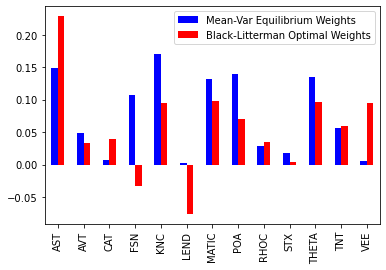

In [32]:
r_eq_2 = r_eq + np.dot(np.dot(tau*np.dot(cov, P.T), np.linalg.inv(tau*np.dot(np.dot(P, cov), P.T)+Omega)), (Q-np.dot(P,r_eq)))


cov_2 = cov + tau*cov - tau*np.dot(np.dot(np.dot(cov,P.T), np.linalg.inv(tau*np.dot(np.dot(P,cov),P.T)+Omega)), tau*np.dot(P,cov))

w_opt = np.dot(np.linalg.inv(lmda*cov_2),r_eq_2)


df = pd.DataFrame([w_mkt.reshape(len(weights)), w_opt.reshape(len(weights))],
                  columns=weights.index.tolist(),
                  index=['Mean-Var Equilibrium Weights','Black-Litterman Optimal Weights'])

df.T.plot(kind='bar', color='br')

# change in weights:

ch = w_opt - w_mkt


for i in range(len(ch)):
    #print(weights.index[i]," ---->", "Expected return=", r_eq[i]*100, "Stdev=", cov[i,i]*100)    
    print(weights.index[i]," ----->", "Rebalance(%):", ch[i]*100, "-----> Opt Weight:", w_opt[i]*100)

In [33]:
print(w_mkt)
print(sum(w_mkt))
print(w_opt)
print(sum(w_opt))


[[0.14957]
 [0.0483 ]
 [0.00641]
 [0.10738]
 [0.17014]
 [0.00165]
 [0.13169]
 [0.13995]
 [0.02901]
 [0.01796]
 [0.13522]
 [0.05679]
 [0.00592]]
[0.99999]
[[ 0.22846271]
 [ 0.03389732]
 [ 0.03917664]
 [-0.03243603]
 [ 0.09545313]
 [-0.07633999]
 [ 0.09859001]
 [ 0.07005286]
 [ 0.03409809]
 [ 0.00394581]
 [ 0.096027  ]
 [ 0.05874416]
 [ 0.09564905]]
[0.74532075]


# Now adding no shorts constraint and also max allocation per asset of 35%, and make weights sum up to 1


In [34]:
too_short = []
too_long = []
# This is new
to_alloc = []



for i in range(len(weights)):
    
    if w_opt[i] <0:

        too_short = np.append(too_short, w_opt[i])
        w_opt[i]=0

    elif w_opt[i] >0.35:

        too_long = np.append(too_long, w_opt[i]-0.35)
        w_opt[i] = 0.15
# This is new
if sum(w_opt)<1:
    to_alloc = np.append(to_alloc, 1-sum(w_opt))
    

#print(w_opt)
pct_shorted = -np.sum(too_short)
pct_excess_long = np.sum(too_long)
# This is new
remains = pct_shorted+pct_excess_long+to_alloc

print("Percent Initially Shorted=", pct_shorted)
print("Excess Long based on 35% constraint=", pct_excess_long)
print("Remaining to Allocate=", remains)

print(to_alloc)
print(w_opt)

Percent Initially Shorted= 0.10877602037933347
Excess Long based on 35% constraint= 0.0
Remaining to Allocate= [0.25467925]
[0.14590323]
[[0.22846271]
 [0.03389732]
 [0.03917664]
 [0.        ]
 [0.09545313]
 [0.        ]
 [0.09859001]
 [0.07005286]
 [0.03409809]
 [0.00394581]
 [0.096027  ]
 [0.05874416]
 [0.09564905]]


In [35]:
len(w_opt)
print(sum(w_opt))

[0.85409677]


AST  -----> Rebalance(%): [17.90651628] -----> Opt Weight: [32.86351628]
AVT  -----> Rebalance(%): [-0.64299853] -----> Opt Weight: [4.18700147]
CAT  -----> Rebalance(%): [2.58246623] -----> Opt Weight: [3.22346623]
FSN  -----> Rebalance(%): [-10.738] -----> Opt Weight: [0.]
KNC  -----> Rebalance(%): [-8.27587408] -----> Opt Weight: [8.73812592]
LEND  -----> Rebalance(%): [4.42873007] -----> Opt Weight: [4.59373007]
MATIC  -----> Rebalance(%): [-4.29796998] -----> Opt Weight: [8.87103002]
POA  -----> Rebalance(%): [-8.2714586] -----> Opt Weight: [5.7235414]
RHOC  -----> Rebalance(%): [-0.38877083] -----> Opt Weight: [2.51222917]
STX  -----> Rebalance(%): [-0.08439607] -----> Opt Weight: [1.71160393]
THETA  -----> Rebalance(%): [-4.31972422] -----> Opt Weight: [9.20227578]
TNT  -----> Rebalance(%): [-1.08632925] -----> Opt Weight: [4.59267075]
VEE  -----> Rebalance(%): [14.47055398] -----> Opt Weight: [15.06255398]


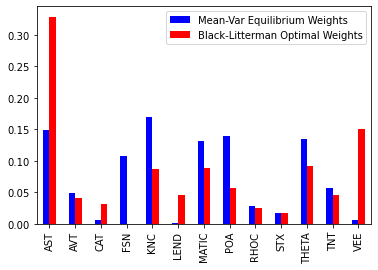

In [36]:
## Now adding proportionally to the DELTA:
# 2- Invest the remaining amount proportionally to the views

D = np.array([ [0.5],[0.092], [0.026], [-0.25], [0.021], [0.26], [0.013], [-0.001], [0.017], [0.115], [0.039], [-0.005], [0.30]])

propor = D/sum(D)



for j in range(len(weights)):
    if propor[j]<0:
        propor[j] = 0
        
w_opt_propor = w_opt + propor*remains
        
if sum(w_opt_propor)>1:
    w_opt_propor = w_opt_propor - (sum(w_opt_propor)-1)/len(weights)
    
for k in range(len(weights)):
    if w_opt_propor[k]<0:
        w_opt_propor[k]=0
    
    
df = pd.DataFrame([w_mkt.reshape(len(weights)), w_opt_propor.reshape(len(weights))],
                  columns=weights.index.tolist(),
                  index=['Mean-Var Equilibrium Weights','Black-Litterman Optimal Weights'])

df.T.plot(kind='bar', color='br')

# change in weights:

ch_propor = w_opt_propor - w_mkt

for i in range(len(ch)):
    #print(weights.index[i]," ---->", "Expected return=", r_eq[i]*100, "Stdev=", cov[i,i]*100)    
    print(weights.index[i]," ----->", "Rebalance(%):", ch_propor[i]*100, "-----> Opt Weight:", w_opt_propor[i]*100)

# Views said:
#### AST will go up 50%
#### VEE will go up 30%
#### FSN will go down 25%

In [37]:
print(sum(w_opt_propor))

[1.01281745]
